<a href="https://colab.research.google.com/github/Sushant072003/Datascience_internship/blob/main/Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2                
Name : Sushant Yadav  
Domain : Data Science

# MOVIE RATING PREDICTION WITH PYTHON :
- Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
- The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
- Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Importing the Dataset using pandas :**

In [ ]:
# Try reading the file with a different encoding
data = pd.read_csv('/content/drive/MyDrive/Python_dataset/IMDb Movies India.csv', encoding='latin-1') # Try 'latin-1' or other encodings if this doesn't work

df = pd.DataFrame(data)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
sum(df.duplicated())

6

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df.shape

(5659, 10)

In [ ]:
# Convert the datatype of year column
df['Year'] = df['Year'].str.replace('(','') # Remove opening bracket
df['Year'] = df['Year'].str.replace(')','') # Remove closing bracket
df['Year'] = df['Year'].astype(int) # Convert to integer

In [ ]:
# Convert datatype of Duration
df['Duration'] = df['Duration'].str.replace(' min','')
df['Duration'] = df['Duration'].astype(int)

In [ ]:
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre')
# Split 'Genre' column and explode into separate rows

# df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)
print(df['Genre'].head(10))

1       Drama
3      Comedy
3     Romance
5      Comedy
5       Drama
5     Musical
6       Drama
6     Romance
6         War
8      Horror
Name: Genre, dtype: object


In [ ]:
# Convert Votes Datatype
df['Votes'] = df['Votes'].str.replace(',','')
df['Votes'] = df['Votes'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


**Data Visualizing :**

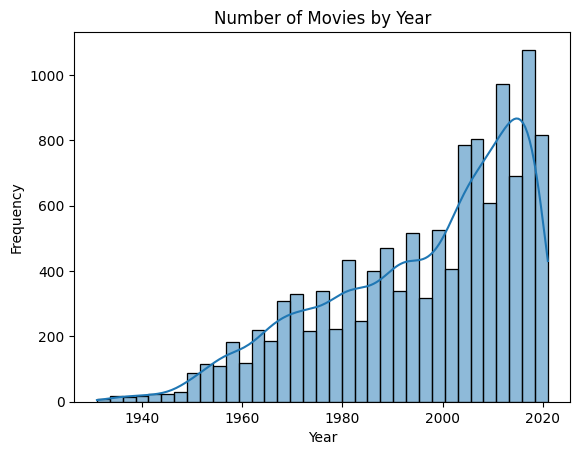

In [ ]:
# Histogram over year in data

sns.histplot(df['Year'], kde=True)
plt.title('Number of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from os import stat
gp = df.groupby(['Year','Genre'])['Rating'].mean().reset_index()
print(gp)

      Year     Genre  Rating
0     1931   Fantasy    6.20
1     1931     Drama    5.75
2     1932   Romance    6.00
3     1932   Musical    6.00
4     1933   Romance    6.20
...    ...       ...     ...
1623  2021    Horror    4.40
1624  2021     Music    9.70
1625  2021   Musical    1.80
1626  2021    Sci-Fi    9.30
1627  2021  Thriller    6.10

[1628 rows x 3 columns]


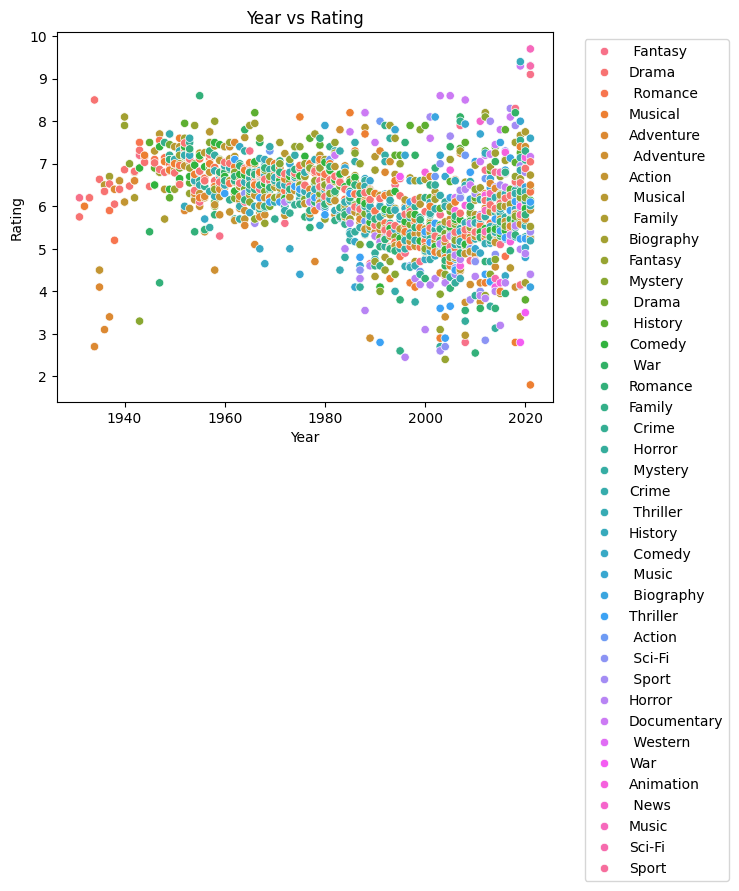

<Figure size 1000x600 with 0 Axes>

In [ ]:


sns.scatterplot(x=gp['Year'], y=gp['Rating'], hue=gp['Genre'])
plt.title('Year vs Rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.figure(figsize=(10, 6))
plt.show()


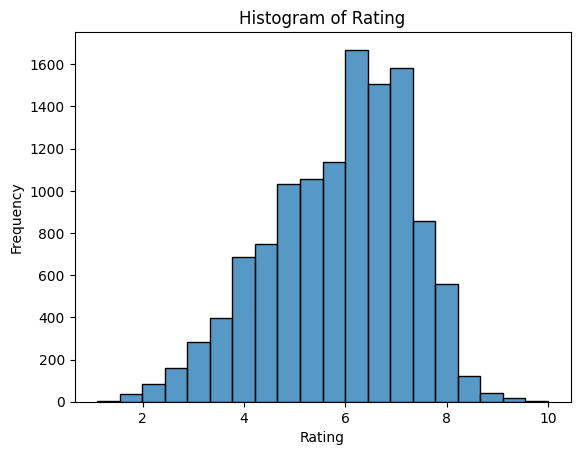

In [ ]:
# Histogram over year in data

sns.histplot(df['Rating'],bins=20)
plt.title('Histogram of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Model Training :             



In [ ]:
## Dropping the Name column
df.drop('Name',axis=1,inplace=True)

In [ ]:
# calcaute an adding new parameter of average of the numeric datatype
df['Genre_mean_Rating'] = df.groupby('Genre')['Rating'].transform('mean')
df['Director_mean_Rating'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor1_mean_Rating'] = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor2_mean_Rating'] = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor3_mean_Rating'] = df.groupby('Actor 3')['Rating'].transform('mean')




In [ ]:
x = df[['Year','Duration','Votes','Genre_mean_Rating','Director_mean_Rating','Actor1_mean_Rating','Actor2_mean_Rating','Actor3_mean_Rating']]
y = df['Rating']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

# Model Building :     

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
Model = LinearRegression()
Model.fit(x_train,y_train)
Model_pred = Model.predict(x_test)

In [ ]:
# Evaluating the model to verify the accuray

print("Accuracy : ",Model.score(x_test,y_test)*100)
print("Accuracy : ",Model.score(x_train,y_train)*100)

Accuracy :  77.10405339689952
Accuracy :  76.89483203645987


In [ ]:
print("The evalution of linear regression :")
print("Mean square error :",mean_squared_error(y_test,Model_pred))
print("Mean Absolute Error :",mean_absolute_error(y_test,Model_pred))
print("R2 Score :",r2_score(y_test,Model_pred))

The evalution of linear regression :
Mean square error : 0.4443164804385582
Mean Absolute Error : 0.5008173291202024
R2 Score : 0.7710405339689952


# Testing :    

In [ ]:
x.head(5)

,Year,Duration,Votes,Genre_mean_Rating,Director_mean_Rating,Actor1_mean_Rating,Actor2_mean_Rating,Actor3_mean_Rating
1,2019,109,8,6.248697,7.000000,6.850000,7.00,7.00
3,2019,110,35,5.838423,4.400000,5.250000,4.40,4.46
3,2019,110,35,5.838739,4.400000,5.250000,4.40,4.46
5,1997,147,827,5.838423,5.335135,4.793617,5.73,5.93
5,1997,147,827,5.875793,5.335135,4.793617,5.73,5.93


In [ ]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [ ]:
data = pd.DataFrame({"Year":[2020], "Duration":[105],
        "Votes":[32],"Genre_mean_Rating":[5.3],
        "Director_mean_Rating":[5.3],"Actor1_mean_Rating":[5.6],
        "Actor2_mean_Rating":[6.6],"Actor3_mean_Rating":[5.3]})
print(data)

   Year  Duration  Votes  Genre_mean_Rating  Director_mean_Rating  \
0  2020       105     32                5.3                   5.3   

   Actor1_mean_Rating  Actor2_mean_Rating  Actor3_mean_Rating  
0                 5.6                 6.6                 5.3  


In [ ]:
# Make Prediction
prediction = Model.predict(data)
print("The predicted rating is :",prediction)

The predicted rating is : [5.49325729]
